### <span style="color:red">IMPORTANT: Only modify cells which have the following comment:</span>
```python
# Modify this cell
```
##### <span style="color:red">Do not add any new cells when you submit the homework</span>

# Setting Up Notebook

Please read 1.FunctionsAsVectors_CLASS.ipynb before attempting this homework. For this notebook you will use the same functions and variables as defined in the _CLASS notebook.

In [2]:
%pylab inline

import numpy as np
import math
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual,widgets
import ipywidgets as widgets

print 'version of ipwidgets=',widgets.__version__

import sys
from lib.recon_plot import recon_plot
from lib.Eigen_decomp import Eigen_decomp
from lib.YearPlotter import YearPlotter

Populating the interactive namespace from numpy and matplotlib
version of ipwidgets= 6.0.0


As in `1.FunctionsAsVectors_Class`, we use the function $f=|x-4|,\,\,\,   x\in[0,2\pi]$ 

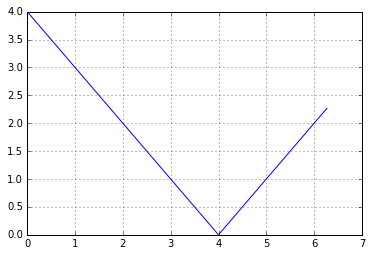

In [3]:
step=2*pi/365
x=arange(0,2*pi,step)

f=abs(x-4)
plot(x,f);
grid()

# Exercise 1:

First we must create our basis, `v`, of sine and cosine functions (and also a single constant function)

Create a function called **getWaves** that returns an array of functions like that in `1.FunctionsAsVectors_CLASS`, but, **getWaves** has a parameter, `frequency`. Get waves should return  an array containing a constant function and all sine and cosine functions with:
$n\leq \text{frequency},\,\,\,n\in N^+$

getWaves(frequency=0) should return only the constant function. Look at `v` in `1.FunctionsAsVectors_CLASS` to find the constant.

    Note: This homework does not require spark
    
######  <span style="color:blue">Code:</span>
```python
v= getWaves(frequency=0)
print len(v)
print type(v)
print type(v[0])
print len(v[0])
print

v= getWaves(frequency=1)
print len(v)
print np.all( v[1]== np.sin(x)*sqrt(step/pi) )  
print np.all( v[2]== np.cos(x)*sqrt(step/pi) )  
```
######  <span style="color:magenta">Output:</span>
```python
1
<type 'list'>
<type 'numpy.ndarray'>
365

3
True
True
```

In [7]:
# Modify this cell

def getWaves(frequency=0, step=2*pi/365, x=arange(0,2*pi,2*pi/365) ):
    # inputs: frequency is the only parameter that will need to vary in this exercise
    #         step, x are constants to aid you in the correct calculation of v
    # ... write implementation
    c=sqrt(step/(pi))
    v=[]
    v.append(np.array(cos(0*x))*c/sqrt(2))
    for f in range(frequency):
        v.append(np.array(sin((f+1)*x))*c)
        v.append(np.array(cos((f+1)*x))*c)
    
    
    return v
    # return the basis, v

In [9]:
import Tester.FunctionsAsVectors as fv
fv.exercise1(getWaves)

Checking getWaves(0)
Checking getWaves(2)
Checking getWaves(4)
Checking getWaves(8)
Checking getWaves(16)
Checking getWaves(32)
Checking getWaves(64)

Great Job!


# Exercise 2:
As can be seen in `1.FunctionsAsVectors_CLASS`, it is clear that $g(i)$ gets closer to $f$ as $i$ increases. To quantify this improvement, we calculate $ \| g(i)- f \|_2 $ as a function of $i$

Write a function **approximate** that approximates $f$ using the eigen decomposition of `v`. **approximate** should return the euclidean norm of your fit. We recommend you use the function `Eigen_decomp`.

    Note: This homework does not require spark


######  <span style="color:blue">Code:</span>
```python
v= getWaves(num=2)
print approximate(f,v,x)
```
######  <span style="color:magenta">Output:</span>
```python
5.12764445178
```

In [55]:
# Modify this cell

def approximate(f,v,x):
    # inputs: f,v,x are given as above. For this exercise, only v will vary
    # ...
    
    eigen_decomp=Eigen_decomp(x,f,np.zeros(len(x)),v)
    fit = np.zeros(len(x))
    coef = eigen_decomp.C
    for i in range(len(coef)):
        fit += coef[i]*v[i]
    error = numpy.linalg.norm(fit - f)
    return error
    # error equals the euclidian norm between f and your fitted model

In [56]:
import Tester.FunctionsAsVectors as fv
fv.exercise2(approximate)


When there are 1 functions in v:
Correct output: 20.7883593877

When there are 5 functions in v:
Correct output: 5.12764445178

When there are 9 functions in v:
Correct output: 3.48780903899

When there are 17 functions in v:
Correct output: 2.5903772003

When there are 33 functions in v:
Correct output: 1.83624640573

When there are 65 functions in v:
Correct output: 1.29120345522

When there are 129 functions in v:
Correct output: 0.878380224172

Great Job!
